In [1]:
import networkx as nx
from nxpd import draw

In [2]:
class dependency_node():
    def __init__(self,doc,dependcies=None):
        self.doc = doc
        self.edges = []
        if dependcies is not None:
            for edge in dependcies:
                self.edges.append((edge,doc))

In [3]:
class dependency_graph():
    def __init__(self,nodes):
        self.nodes,self.edges = construct_values(nodes)
    def draw(self):
        return draw_causal_graph(self.nodes,self.edges)

In [4]:
def draw_causal_graph(nodes,edges):
    G = nx.DiGraph()
    G.graph['dpi'] = 120
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return draw(G, show='ipynb')

In [5]:
def construct_values(decision_variables):
    nodes = []
    edges = []
    for decision in decision_variables:
        nodes.append(decision.doc)
        if decision.edges:
            edges.extend(decision.edges)
    return nodes,edges

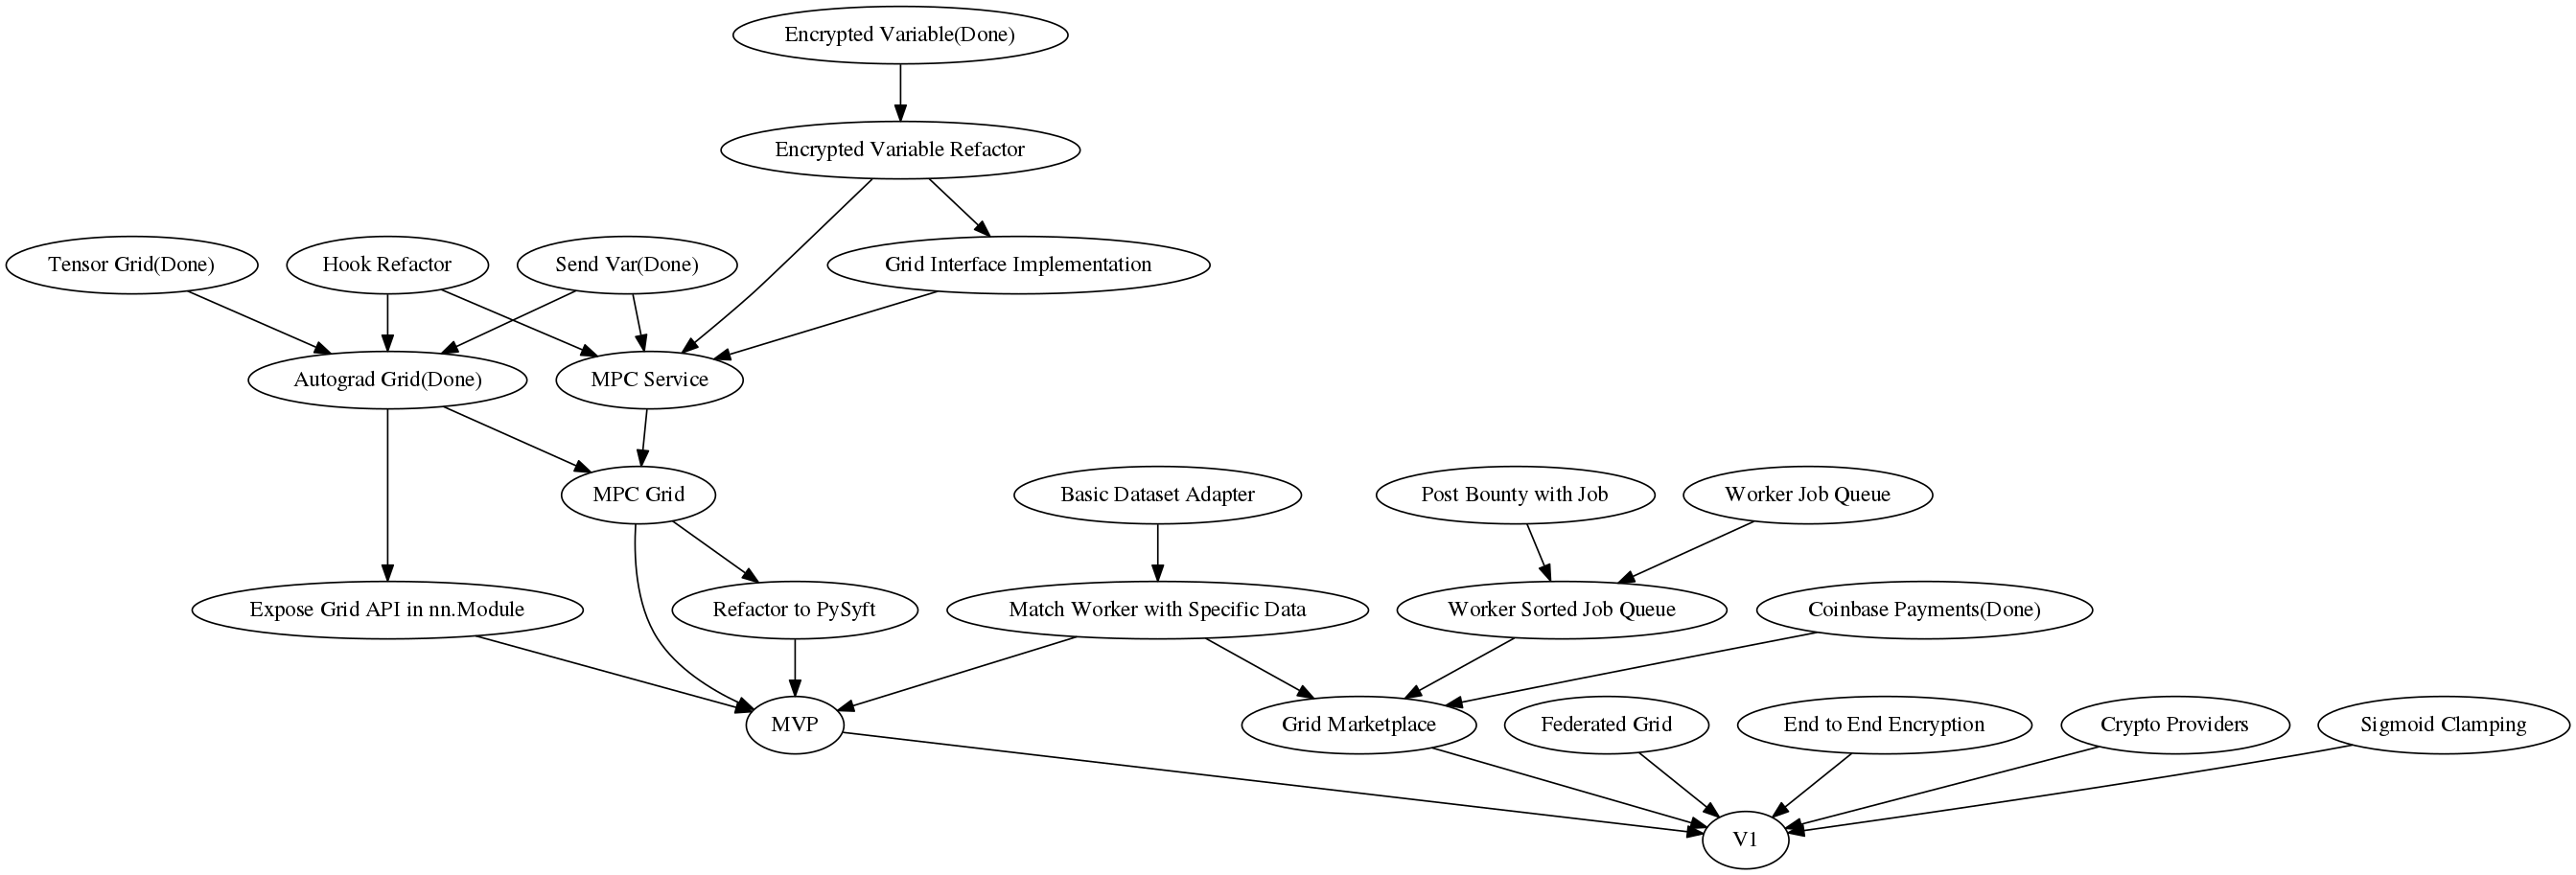

In [6]:
nodes = []
nodes.append(dependency_node('MVP',['Expose Grid API in nn.Module','MPC Grid','Match Worker with Specific Data','Refactor to PySyft']))
nodes.append(dependency_node('MPC Grid',['Autograd Grid(Done)','MPC Service']))
nodes.append(dependency_node('Expose Grid API in nn.Module',['Autograd Grid(Done)']))
nodes.append(dependency_node('Encrypted Variable Refactor',['Encrypted Variable(Done)']))
nodes.append(dependency_node('Autograd Grid(Done)',['Send Var(Done)','Hook Refactor','Tensor Grid(Done)']))
nodes.append(dependency_node('MPC Service',['Send Var(Done)','Hook Refactor','Encrypted Variable Refactor','Grid Interface Implementation']))
nodes.append(dependency_node('Match Worker with Specific Data',['Basic Dataset Adapter']))
nodes.append(dependency_node('V1',['Federated Grid','End to End Encryption','MVP','Crypto Providers','Sigmoid Clamping','Grid Marketplace']))
nodes.append(dependency_node('Refactor to PySyft',['MPC Grid']))
nodes.append(dependency_node('Grid Marketplace',['Coinbase Payments(Done)','Worker Sorted Job Queue','Match Worker with Specific Data']))
nodes.append(dependency_node('Grid Interface Implementation',['Encrypted Variable Refactor']))
nodes.append(dependency_node('Worker Sorted Job Queue',['Worker Job Queue','Post Bounty with Job']))
dep = dependency_graph(nodes)
dep.draw()